In [1]:
import numpy as np

In [2]:
import pandas as pd

In [5]:
import os
for dirname,_, filenmaes in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
sns.set(style='whitegrid')


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv(r'C:\Users\user\Desktop/heart.csv')

In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
print('the shape of the dataset:',df.shape)

the shape of the dataset: (303, 14)


In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df['target'].nunique()

2

In [19]:
df['target'].unique()

array([1, 0], dtype=int64)

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

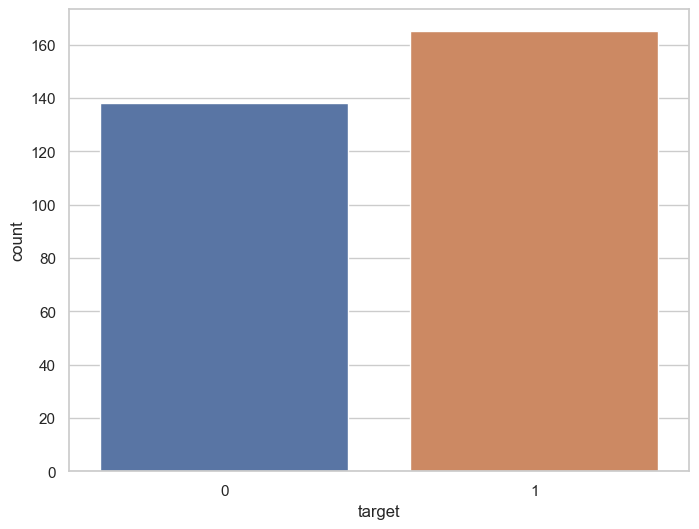

In [27]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',data=df)
plt.show()

In [29]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

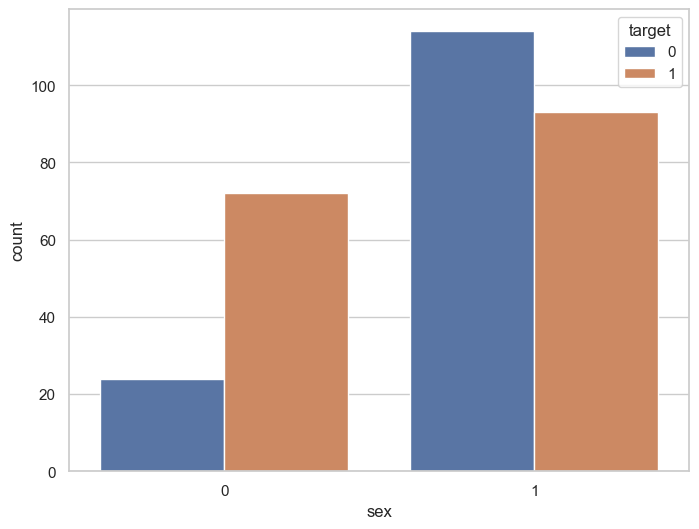

In [32]:
f.ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='sex',hue='target',data=df)
plt.show()

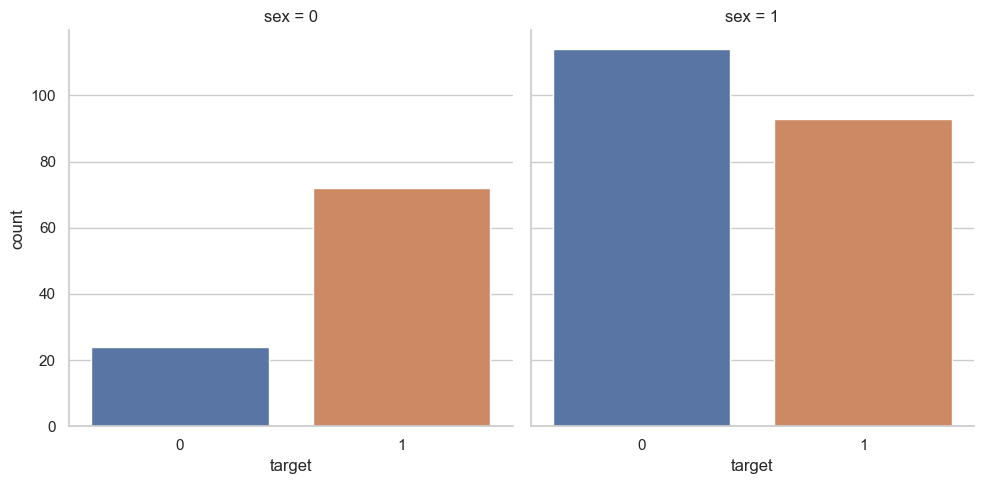

In [33]:
ax=sns.catplot(x='target',col='sex',height=5,aspect=1,data=df,kind='count')

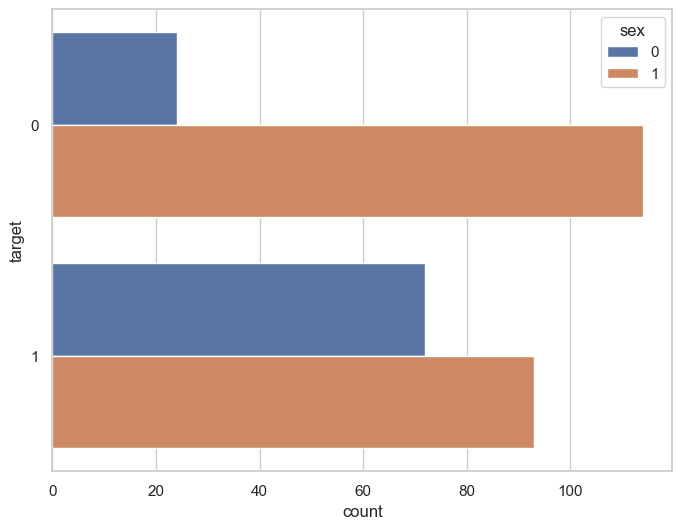

In [35]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(y='target',data=df,hue='sex')
plt.show()

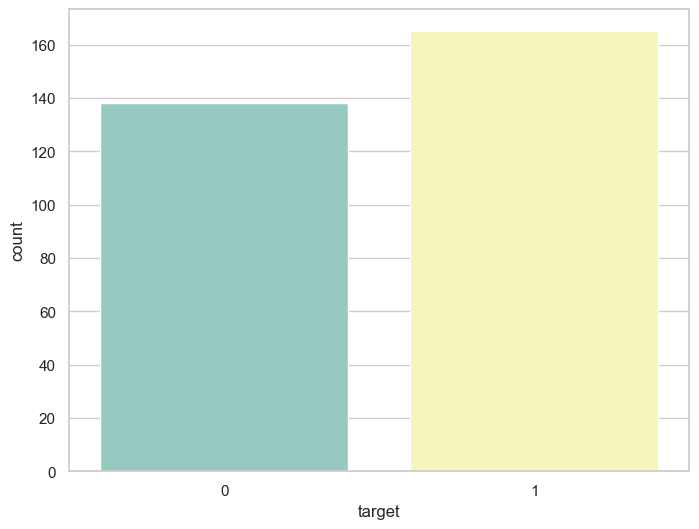

In [38]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',data=df,palette='Set3')
plt.show()

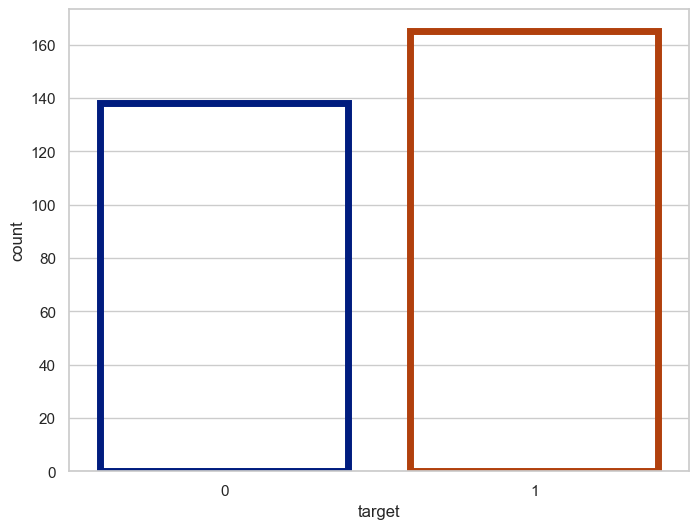

In [39]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',data=df,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
plt.show()

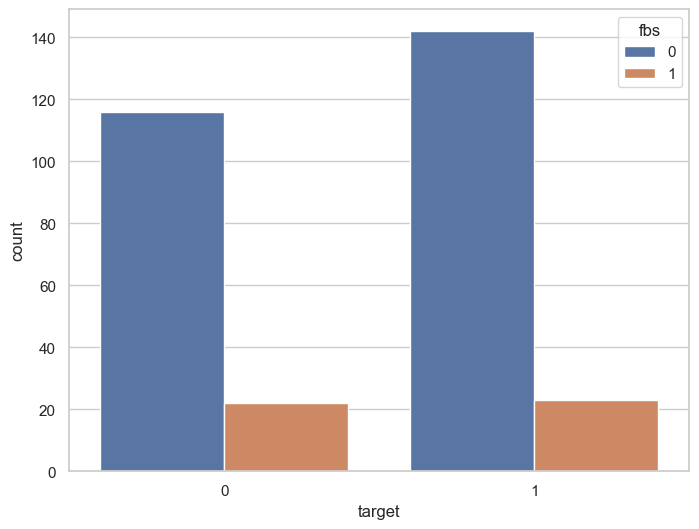

In [43]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='fbs',data=df)
plt.show()

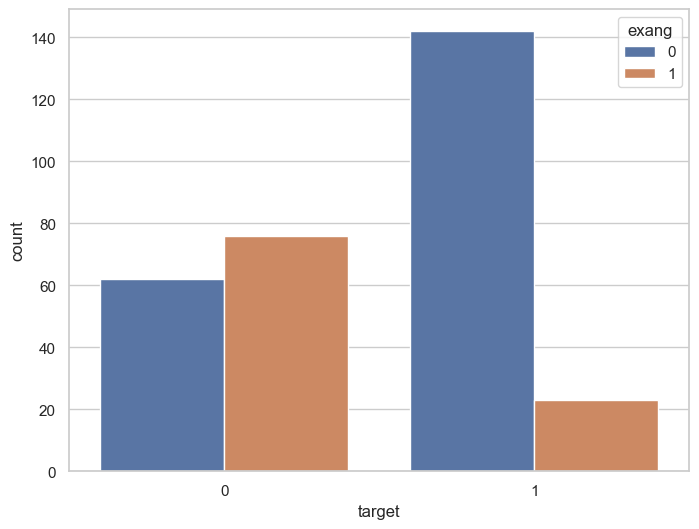

In [45]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',data=df,hue='exang')
plt.show()

In [46]:
correlation=df.corr()df

In [48]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [52]:
df['cp'].nunique()

4

In [53]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

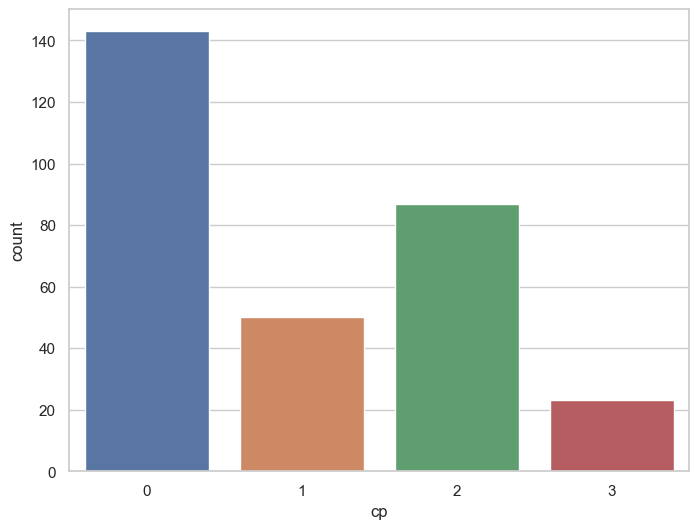

In [54]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',data=df)
plt.show()

In [57]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

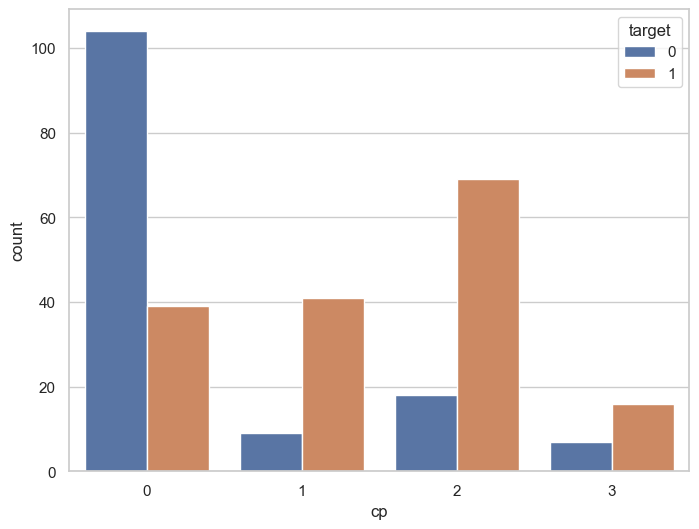

In [59]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',data=df,hue='target')
plt.show()

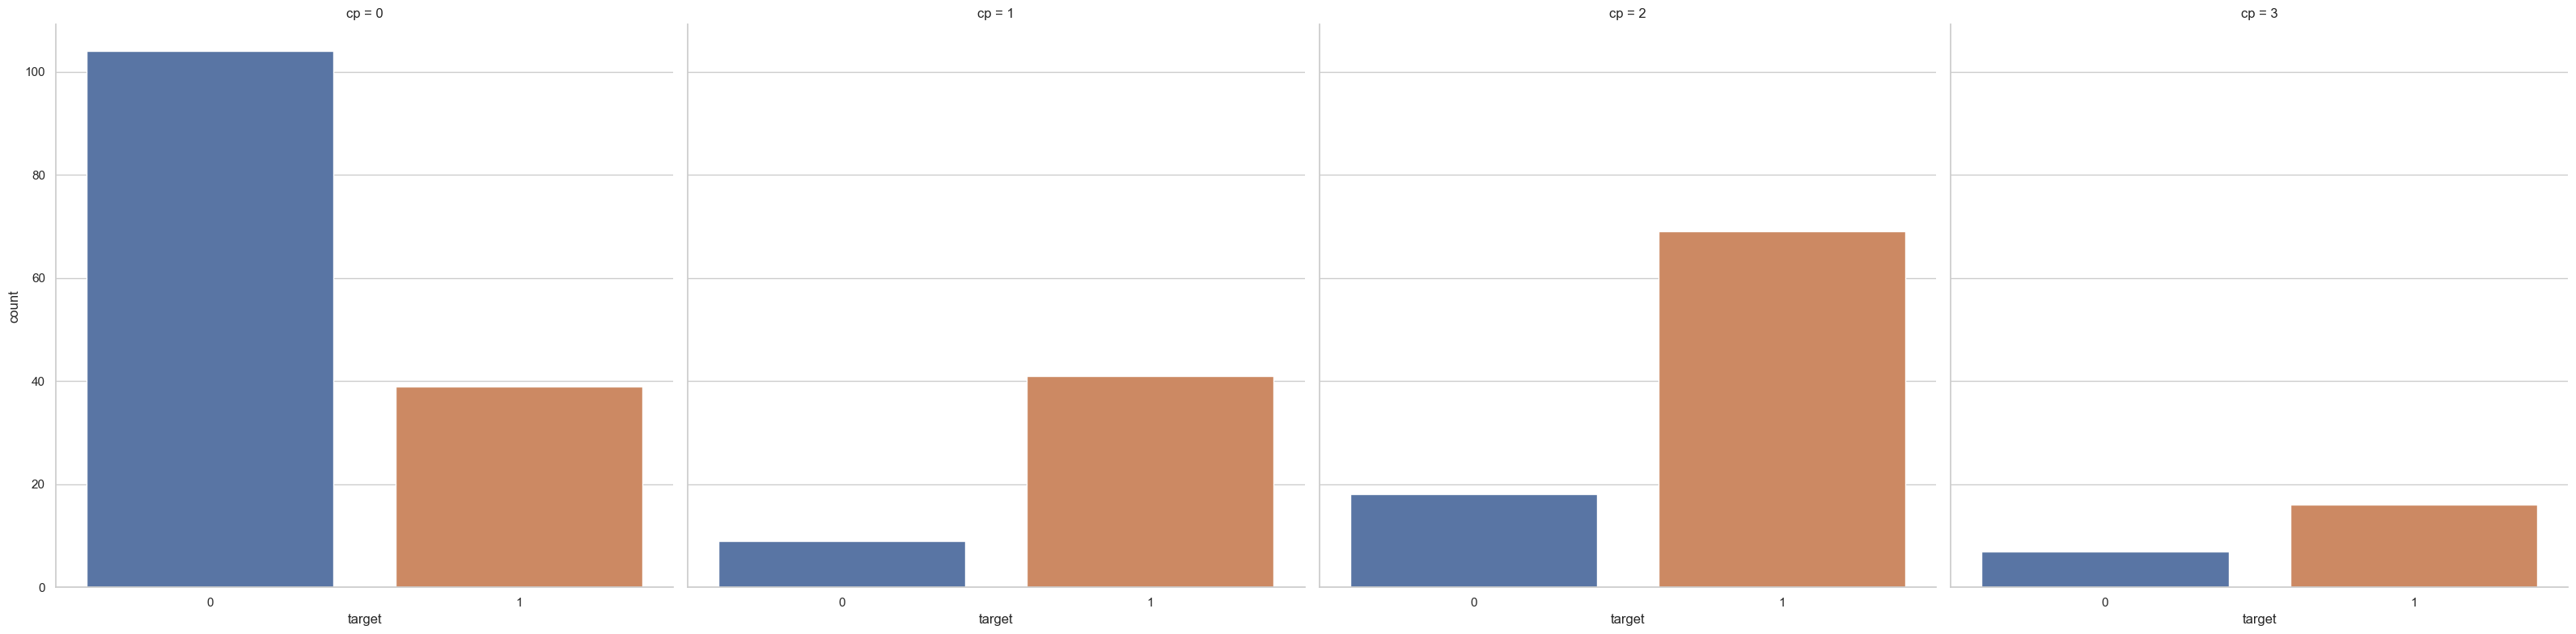

In [62]:
ax=sns.catplot(x='target',col='cp',kind='count',data=df,height=8,aspect=1)

In [63]:
df['thalach'].nunique()

91

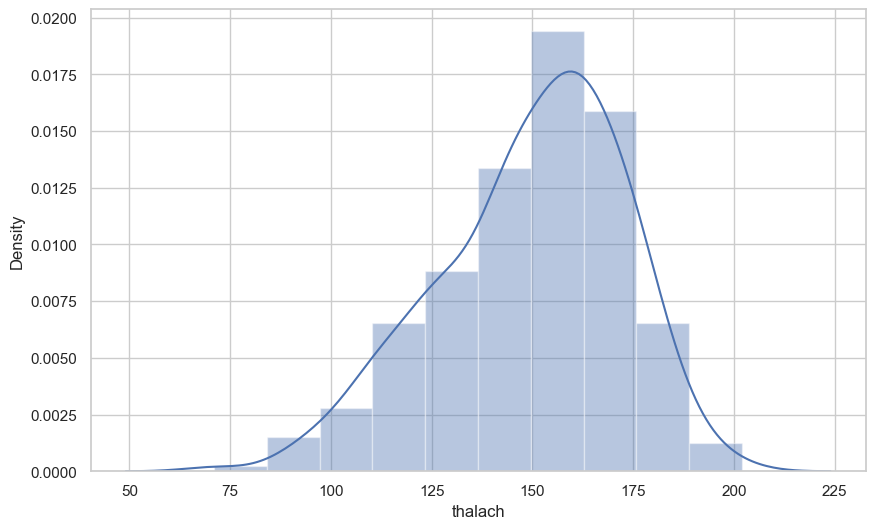

In [66]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,bins=10)
plt.show()

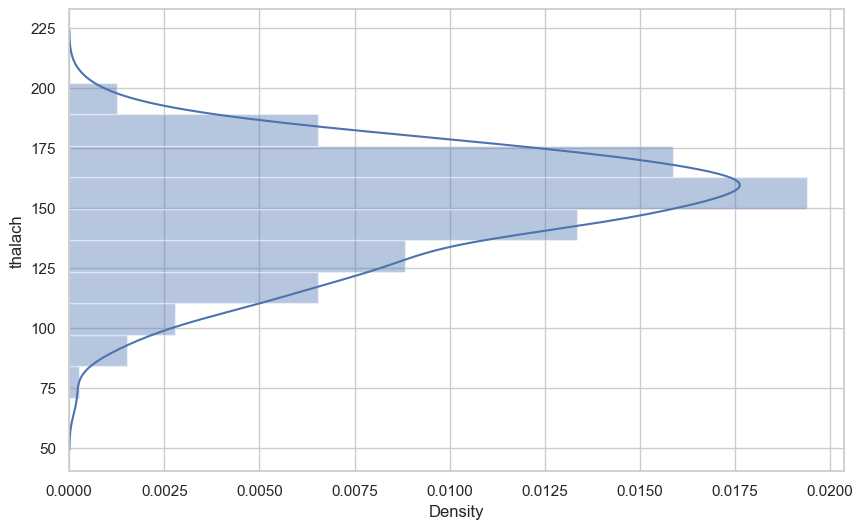

In [70]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,bins=10,vertical=True)

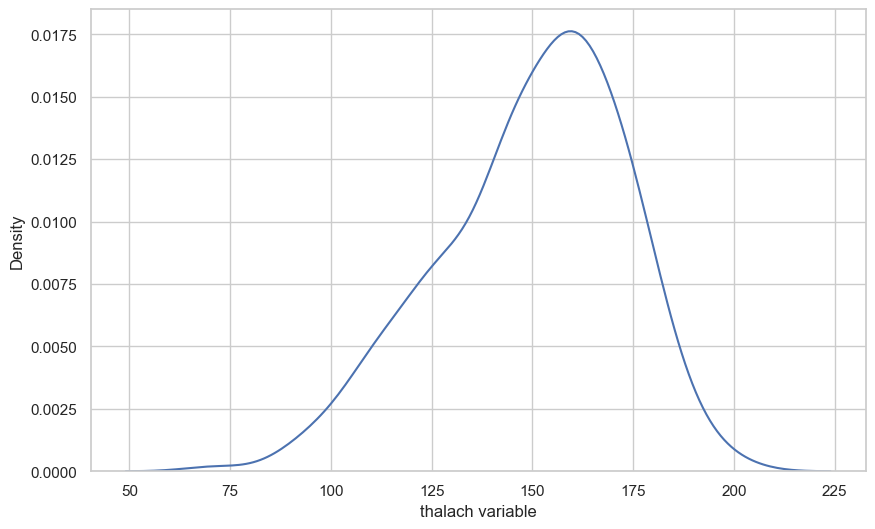

In [71]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x)
plt.show()

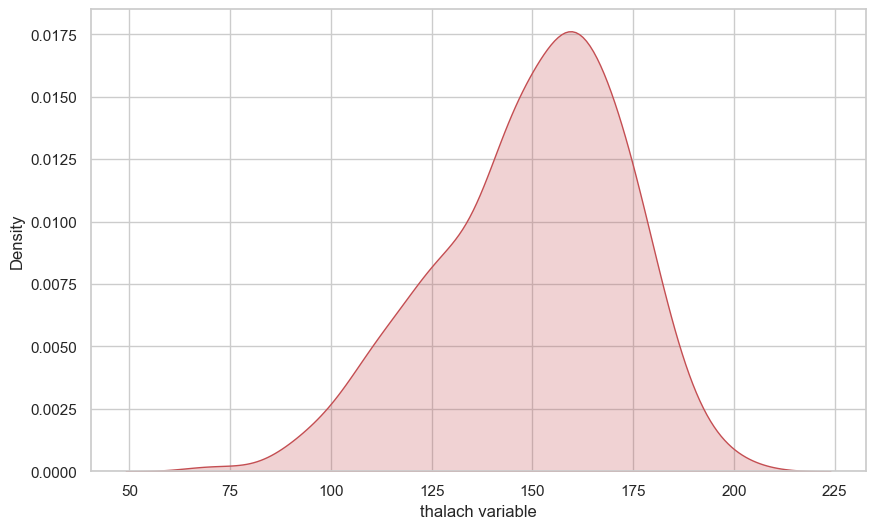

In [78]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x,shade=True,color='r')

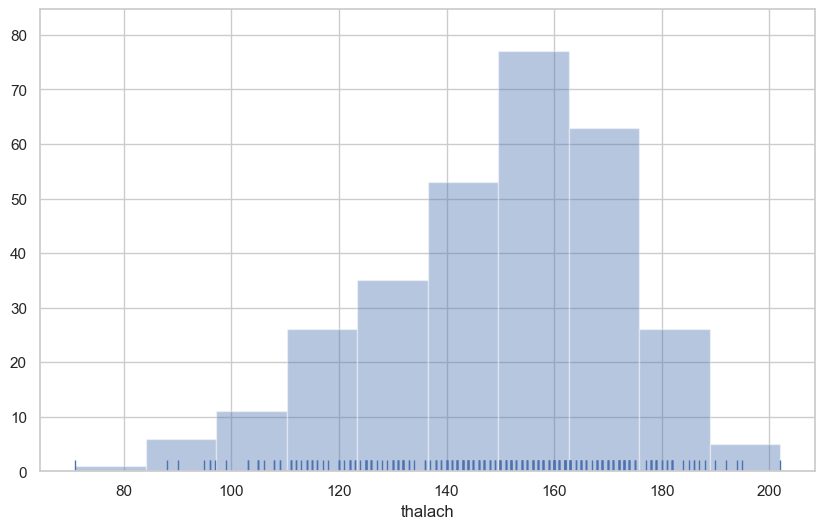

In [81]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,rug=True,kde=False,bins=10)


<Axes: xlabel='target', ylabel='thalach'>

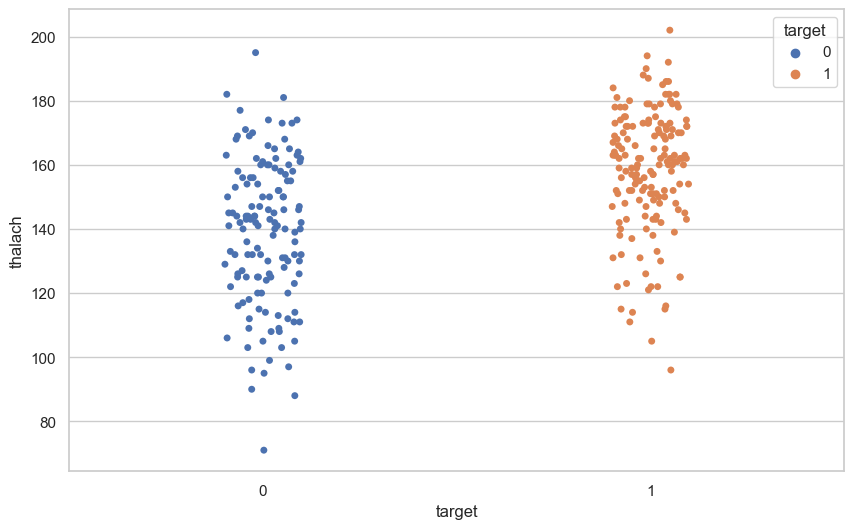

In [83]:
f,ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='target',y='thalach',data=df,hue='target')

<Axes: xlabel='target', ylabel='thalach'>

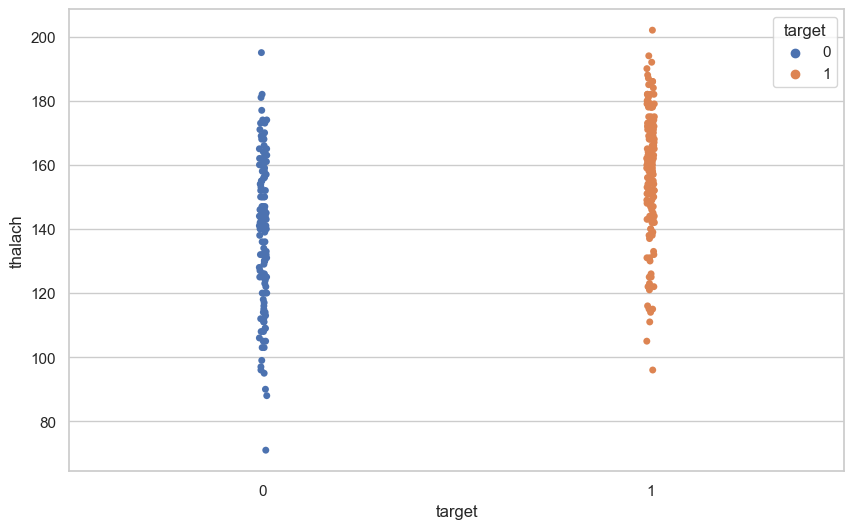

In [85]:
f,ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='target',y='thalach',data=df,jitter=0.01,hue='target')

<Axes: xlabel='target', ylabel='thalach'>

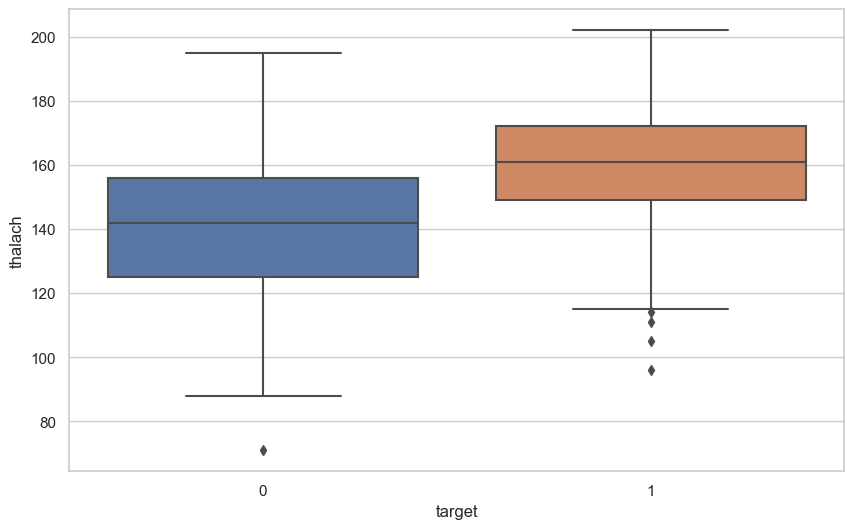

In [86]:
f,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x='target',y='thalach',data=df)

[Text(0, 0.5, 'age'),
 Text(0, 1.5, 'sex'),
 Text(0, 2.5, 'cp'),
 Text(0, 3.5, 'trestbps'),
 Text(0, 4.5, 'chol'),
 Text(0, 5.5, 'fbs'),
 Text(0, 6.5, 'restecg'),
 Text(0, 7.5, 'thalach'),
 Text(0, 8.5, 'exang'),
 Text(0, 9.5, 'oldpeak'),
 Text(0, 10.5, 'slope'),
 Text(0, 11.5, 'ca'),
 Text(0, 12.5, 'thal'),
 Text(0, 13.5, 'target')]

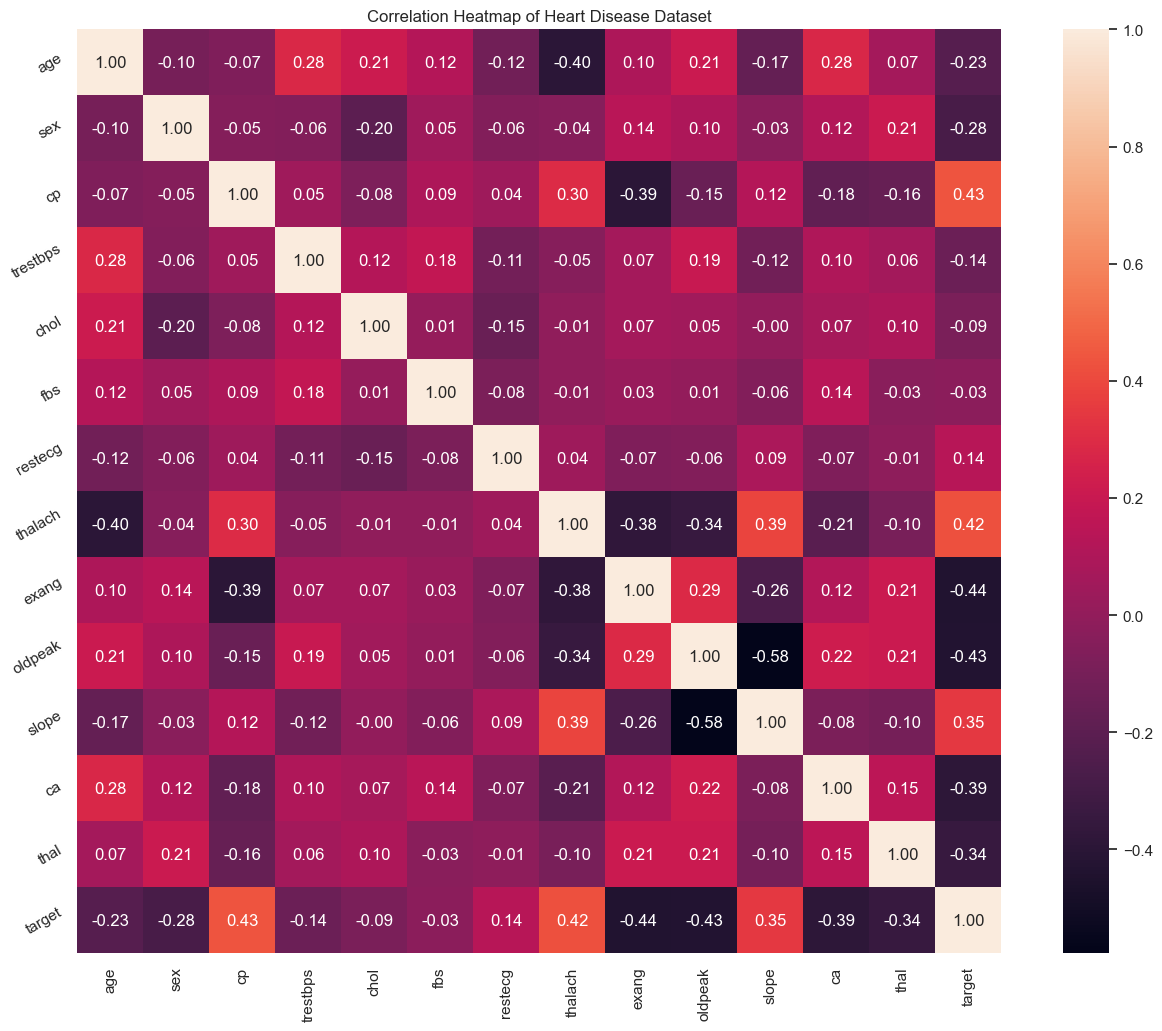

In [88]:
plt.figure(figsize=(16,12))
plt.title("Correlation Heatmap of Heart Disease Dataset")
a=sns.heatmap(correlation,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)

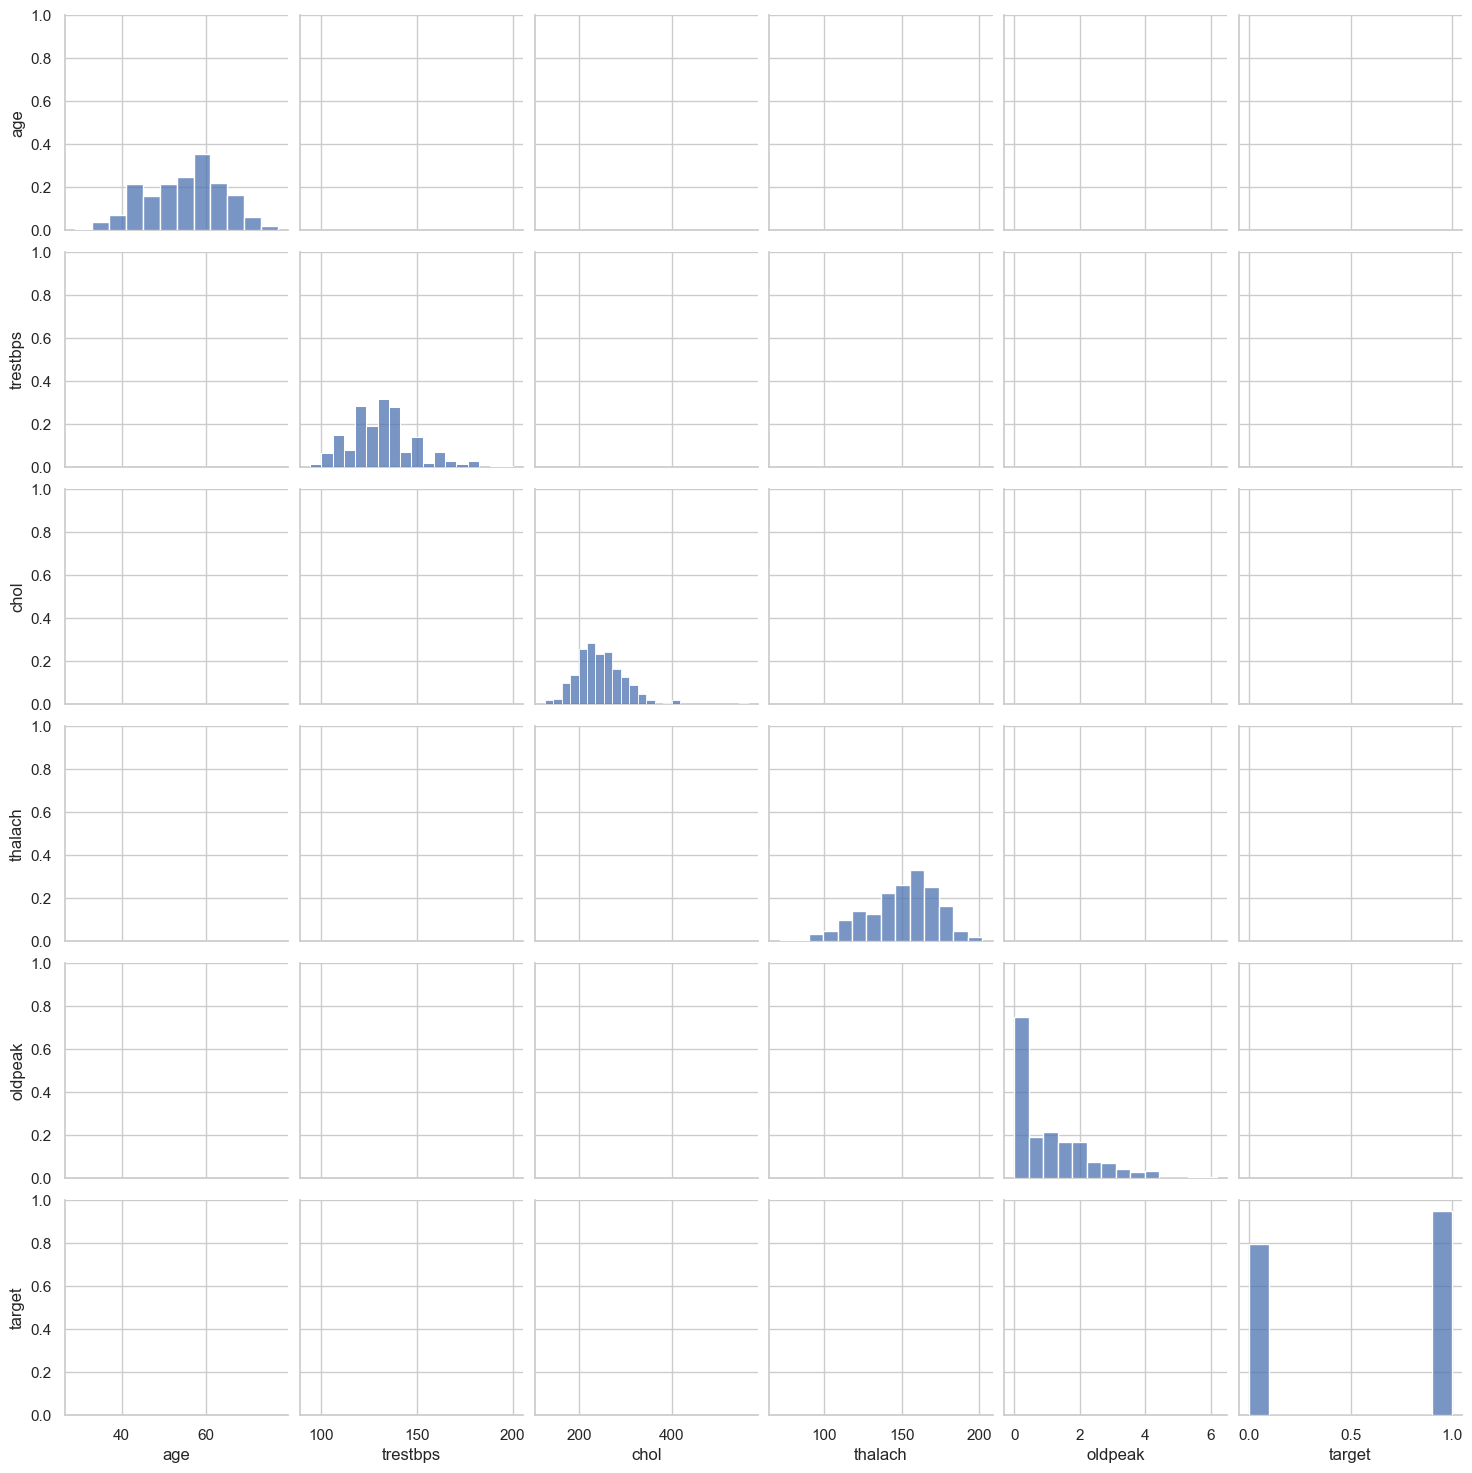

In [95]:
num_var=['age','trestbps','chol','thalach','oldpeak','target']
sns.pairplot(df[num_var],kind='Scatter',diag_kind='hist')
plt.show()


In [98]:
df['age'].nunique()

41

In [99]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

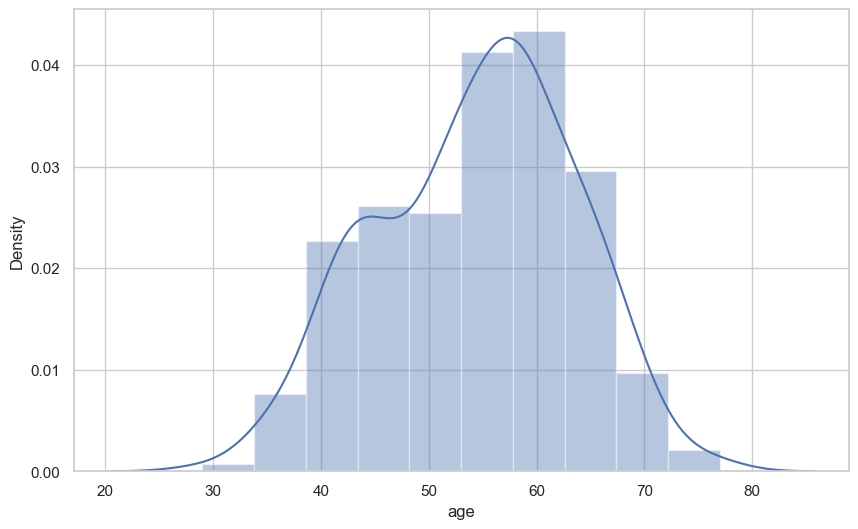

In [104]:
f,ax=plt.subplots(figsize=(10,6))
x=df['age']
ax=sns.distplot(x,bins=10)

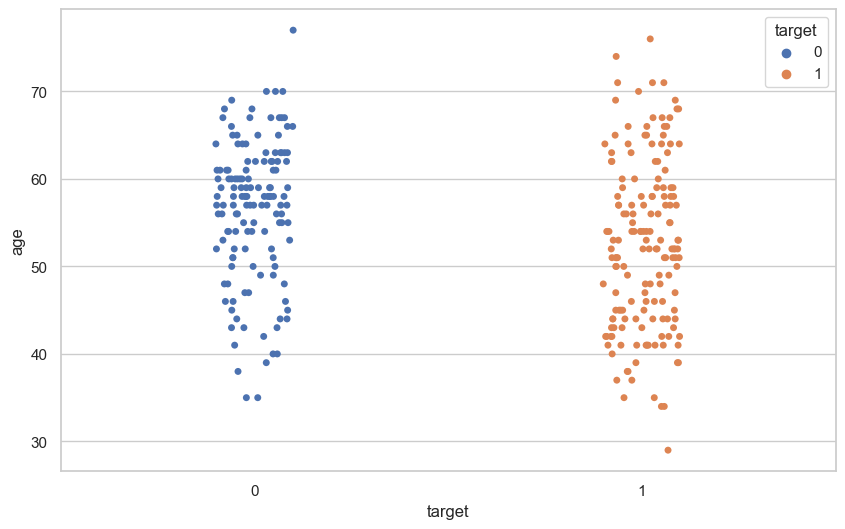

In [109]:
f,ax=plt.subplots(figsize=(10,6))
ax=sns.stripplot(x='target',y='age',data=df,hue='target')

<Axes: xlabel='target', ylabel='age'>

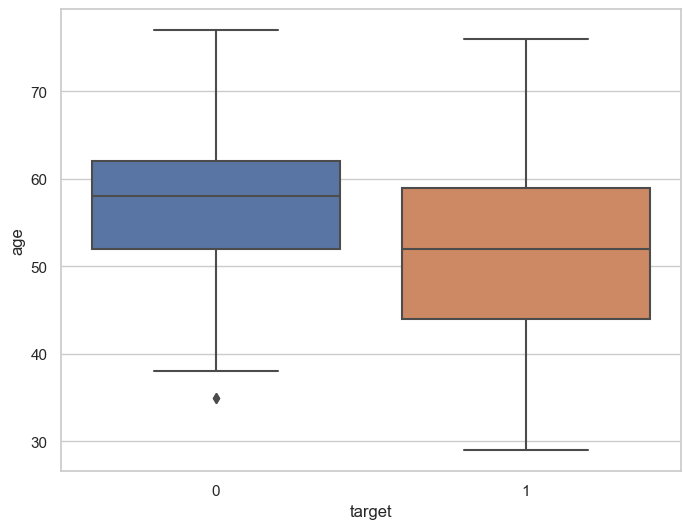

In [110]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='target',y='age',data=df)

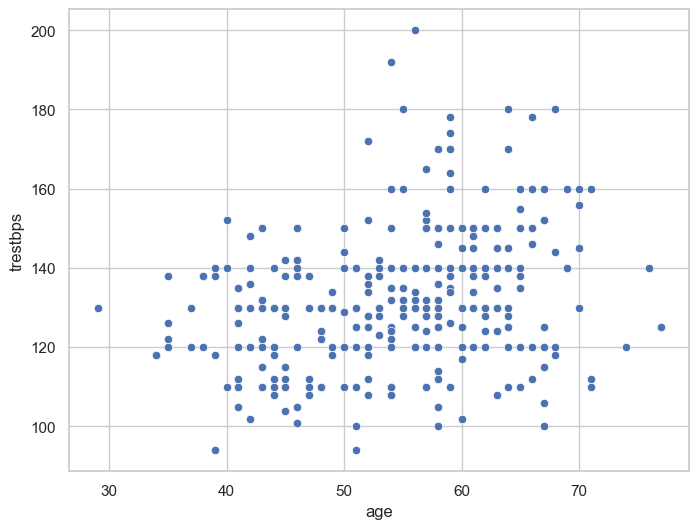

In [114]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.scatterplot(x='age',y='trestbps',data=df)

<Axes: xlabel='age', ylabel='trestbps'>

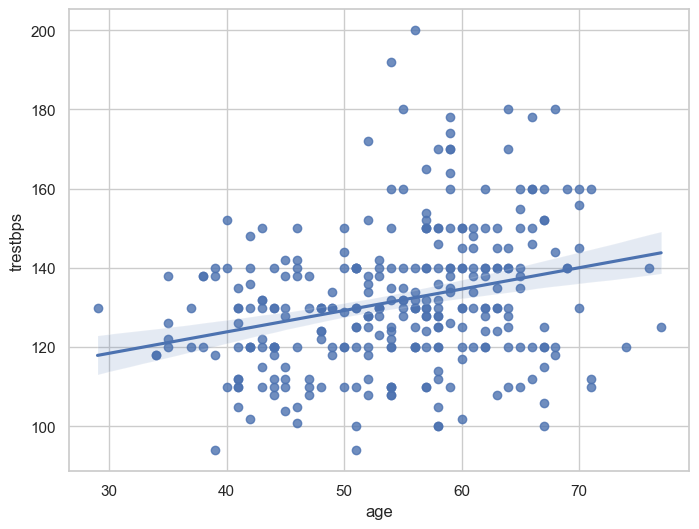

In [115]:
f,ax=plt.subplots(figsize=(8,6))
sns.regplot(x='age',y='trestbps',data=df)

<Axes: xlabel='age', ylabel='chol'>

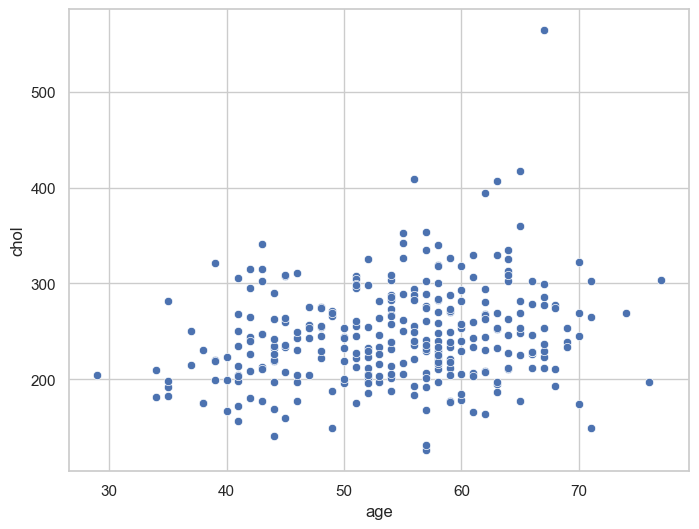

In [116]:
f,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x='age',y='chol',data=df)

<Axes: xlabel='age', ylabel='chol'>

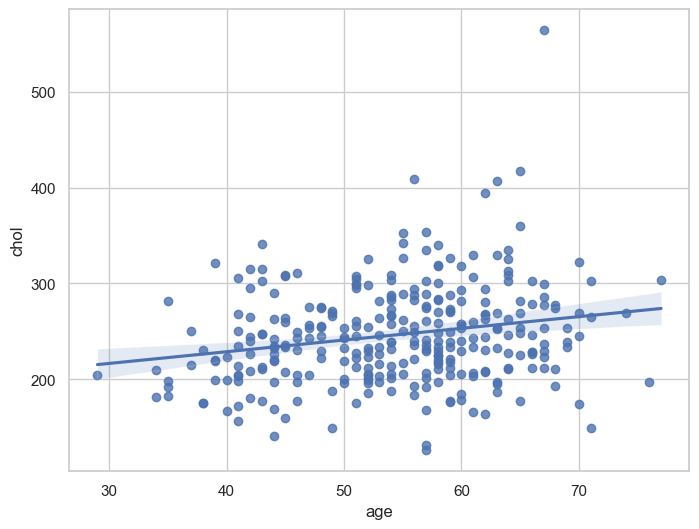

In [117]:
f,ax=plt.subplots(figsize=(8,6))
sns.regplot(x='age',y='chol',data=df)

<Axes: xlabel='chol', ylabel='thalach'>

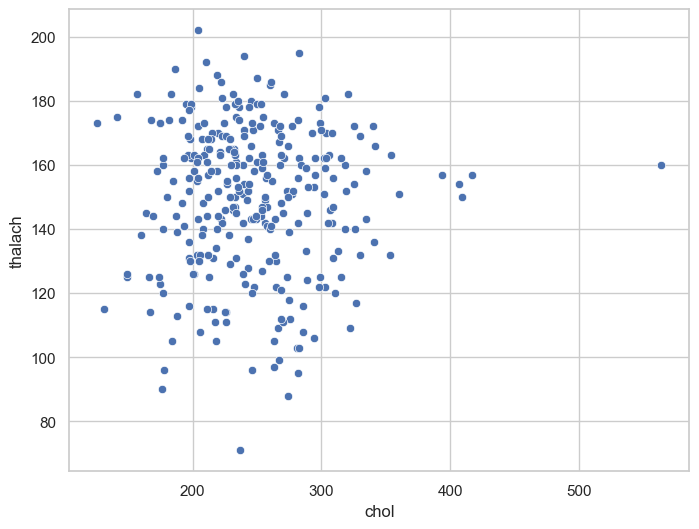

In [121]:
f,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df)

<Axes: xlabel='chol', ylabel='thalach'>

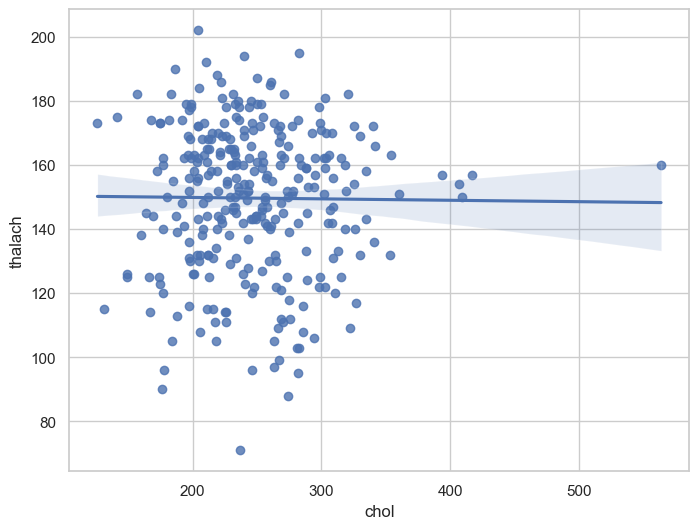

In [122]:
f,ax=plt.subplots(figsize=(8,6))
sns.regplot(x='chol',y='thalach',data=df)

In [123]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [127]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

<Axes: xlabel='chol'>

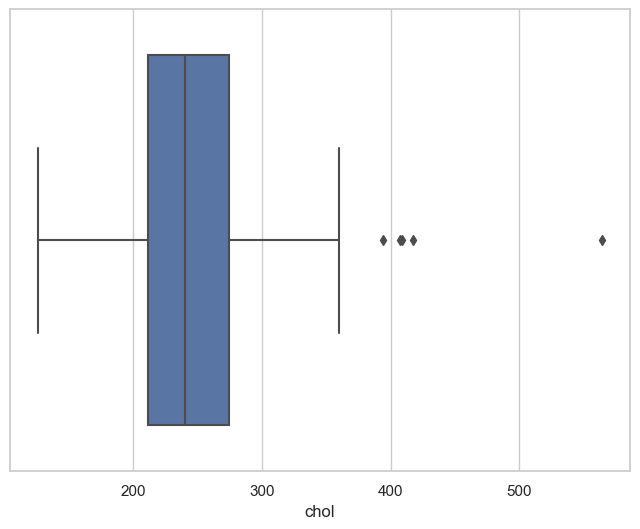

In [128]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['chol'])

In [129]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps'>

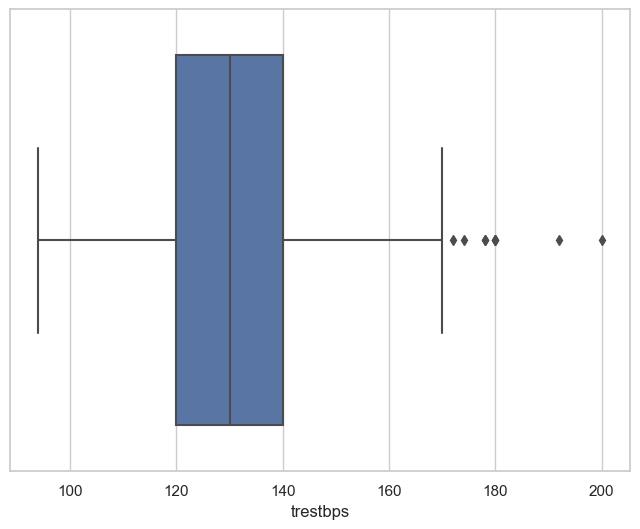

In [130]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['trestbps'])

<Axes: xlabel='chol'>

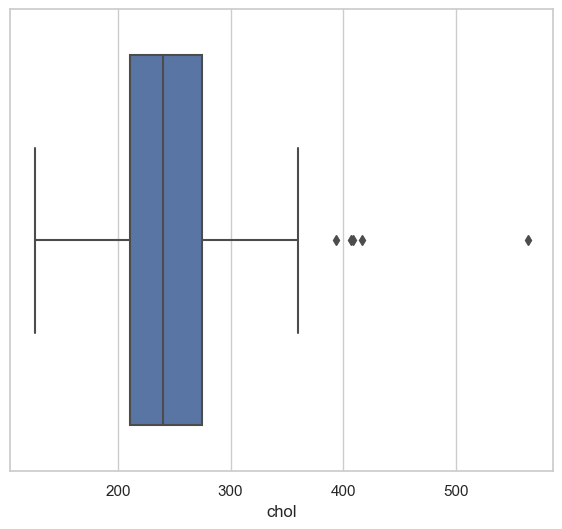

In [131]:
f,ax=plt.subplots(figsize=(7,6))
sns.boxplot(x=df['chol'])

In [132]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

<Axes: xlabel='thalach'>

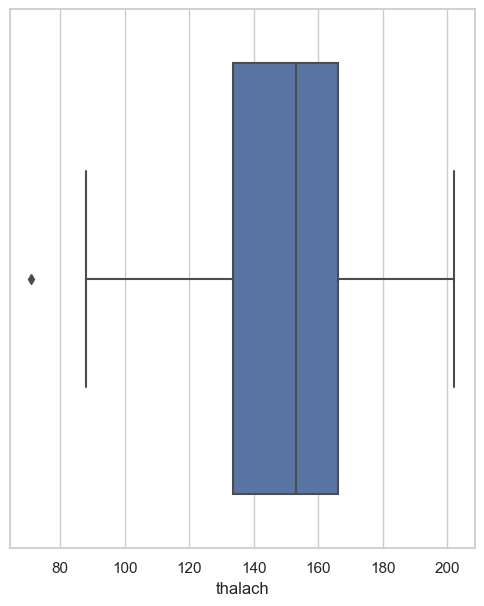

In [133]:
f,ax=plt.subplots(figsize=(6,7))
sns.boxplot(x=df['thalach'])

In [134]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

<Axes: xlabel='oldpeak'>

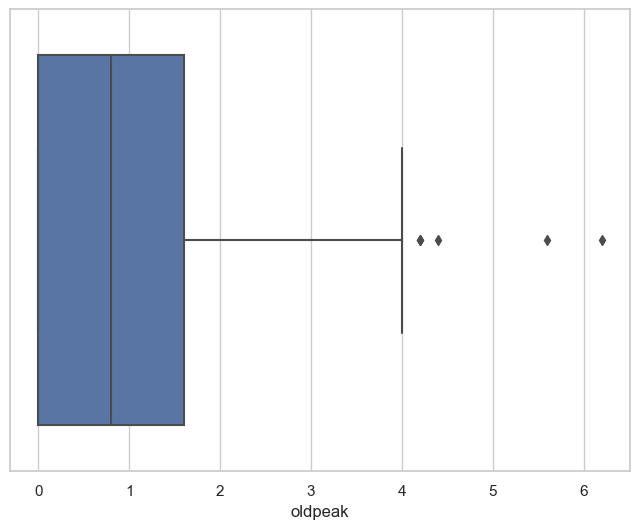

In [135]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['oldpeak'])